### 🔹 Random Forest Regression  

Random Forest Regression is an **ensemble learning method** that builds multiple Decision Trees and combines their predictions to achieve better accuracy and robustness.  
Instead of relying on a single tree, Random Forest uses the concept of **bagging (Bootstrap Aggregating)** to reduce variance and prevent overfitting.  

The main idea:  
- A large number of decision trees are trained on random subsets of the data and features.  
- Each tree makes a prediction, and the final output is the **average of all predictions**.  
- This reduces the risk of errors from individual trees and improves model stability.  

Mathematically, if we have \(N\) trees:  

$$
\hat{Y} = \frac{1}{N} \sum_{i=1}^{N} f_i(X)
$$  

where:  
- $(f_i(X))$ is the prediction of the $(i)$-th decision tree,  
- $(\hat{Y})$ is the final predicted value.  

Random Forest Regression helps us to:  
- Handle **non-linear and complex relationships** in data.  
- Improve accuracy compared to a single Decision Tree.  
- Provide feature importance insights to understand which variables matter most.  

In this notebook, we will implement **Random Forest Regression** and compare its performance with a single Decision Tree 🚀.  


# --------------------------------------------------------------------------

# import dataset

In [1]:
# from google.colab import files, drive

# up = files.upload()
# drive.mount('/content/drive')

In [2]:
import pandas as pd

df = pd.read_csv('dataset.csv')
df.head(3)

,A,B,C,T
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136


In [3]:
df = df[['A', 'T']]
df.head(3)

,A,T
0,2.0,196
1,2.4,221
2,1.5,136


In [4]:
# df.info()

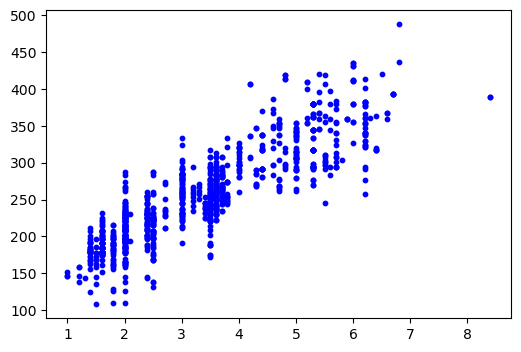

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df[['A']], df['T'], s=10, c='b')
plt.show()

# cleaning

In [6]:
# clean the data

# encoding

In [7]:
# encode the data

# define x , y

In [8]:
import numpy as np

x = df[['A']].values   # 2D
y = df['T'].values     # 1D

# spliting

In [9]:
# # finding best random state 

# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import r2_score

# import time
# t1 = time.time()
# lst = []
# for i in range(1,10):
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i) 
#     rfr = RandomForestRegressor() 
#     rfr.fit(x_train, y_train)
#     yhat_test = rfr.predict(x_test)
#     r2 = r2_score(y_test, yhat_test)
#     lst.append(r2)
# t2 = time.time()

# print(f"run time: {round((t2 - t1) / 60 , 0)} min")
# print(f"R2_score = {round(max(lst),2)}")
# print(f"random_state = {np.argmax(lst) + 1}")

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# scaling

In [11]:
# No need for scaling in Random Forest Regression

# train the model

In [12]:
# # K-fold cross validation

# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# parameters = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [50, 100, 150]
# }

# rf = RandomForestRegressor()
# gs = GridSearchCV(estimator=rf, param_grid=parameters, cv=5)

# gs.fit(x_train, y_train)

# best_params = gs.best_params_
# print(best_params)

In [13]:
# def param
# n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, 
# min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, 
# verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None, monotonic_cst=None

In [14]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=300)
rfr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=300)

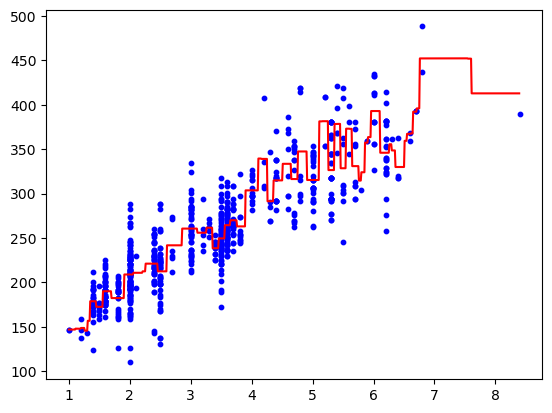

In [15]:
plt.scatter(x_train, y_train, color='b', s=10)
xx = np.arange(np.min(x_train), np.max(x_train), 0.01).reshape(-1, 1)
plt.plot(xx, rfr.predict(xx), color='r')
plt.show()

# predict test data

In [16]:
yhat_test = rfr.predict(x_test)

# evaluating the moodel

In [17]:
from sklearn.metrics import r2_score

print("r2-score (train data): %0.4f" % r2_score(y_train, rfr.predict(x_train)))
print("r2-score (test data): %0.4f" % r2_score(y_test, yhat_test))

r2-score (train data): 0.8172
r2-score (test data): 0.8077


In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(f"MSE (train data): {mean_squared_error(y_train, rfr.predict(x_train))}")
print(f"RMSE (train data): {np.sqrt(mean_squared_error(y_train, rfr.predict(x_train)))}")
print(f"MAE (train data): {mean_absolute_error(y_train, rfr.predict(x_train))}")
print('------------')
print(f"MSE (test data): {mean_squared_error(y_test, yhat_test)}")
print(f"RMSE (test data): {np.sqrt(mean_squared_error(y_test, yhat_test))}")
print(f"MAE (test data): {mean_absolute_error(y_test, yhat_test)}")

MSE (train data): 725.2524730693635
RMSE (train data): 26.93051193478066
MAE (train data): 20.615688311073427
------------
MSE (test data): 797.6419818902306
RMSE (test data): 28.242556220891736
MAE (test data): 21.06199463132279


# predict new data

In [19]:
rfr.predict([[2]])

array([208.99483971])

# feature importance

In [20]:
# importances = rfr.feature_importances_
# X = df[['A', 'B', 'C']]
# feature_names = X.columns

# print(importances)
# print(feature_names)

In [21]:
# fi = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# fi = fi.sort_values(by='Importance', ascending=False)
# print(fi)

# save the model

In [22]:
# import joblib

# joblib.dump(rfr, 'rfr_model.pkl')

# load the model

In [23]:
# import joblib

# rfr = joblib.load('rfr_model.pkl')